In [394]:
import pandas as pd
from PIL import Image
import cv2
import os
import numpy as np
from prettytable import PrettyTable
import numpy as np

In [395]:
table = PrettyTable()
table.field_names = ["image", "No. of Ladi/Rows", "Products", "type"]
data = pd.DataFrame(columns=["image", "No. of Ladi/Rows", "Products", "type"])

In [396]:
annot = pd.read_csv("/Users/adityakumar/Downloads/Retail Pulse - Assignment 2/annotations.csv")
file_names = pd.unique(annot["filename"])


In [397]:
aerial = os.listdir("/Users/adityakumar/Downloads/Retail Pulse - Assignment 2/Aerial")
rack = os.listdir("/Users/adityakumar/Downloads/Retail Pulse - Assignment 2/Rack")

In [398]:
count = 0 
for file in file_names:
    name_list = np.where(annot["filename"]==file)
    prod_line = {}

    for i in name_list[0]:
        if file in aerial:
            xy = "xmin"
            ty = "aerial"
        else:
            xy = "ymin"
            ty = "rack"
        if len(prod_line)==0:
            prod_line[annot[xy][i]] = {"no_prod":1, "prod" :[annot["class"][i]]}
            continue
        newi = annot[xy][i]
        new_list = [abs(j-newi) for j in prod_line.keys()]
        if min(new_list) <= 50:
            ind = list(prod_line.keys())[new_list.index(min(new_list))]
            prod_line[newi] = prod_line.pop(ind)
            ind = newi
            prod_line[ind]["no_prod"]+=1
            if annot["class"][i] not in prod_line[ind]["prod"]:
                prod_line[ind]["prod"].append(annot["class"][i])
        else:
            prod_line[annot[xy][i]] = {"no_prod":1, "prod" :[annot["class"][i]]}
    
    alist = []
    for i in prod_line.values():
        alist.append(i["prod"])
    data.loc[len(data)] = [file, len(prod_line), alist, ty]
        
    
        
        

In [399]:
data.to_csv("/Users/adityakumar/Downloads/new_data.csv")

In [400]:
data

,image,No. of Ladi/Rows,Products,type
0,200425 (80).jpeg,4,"[[lays_cs], [lays_asco], [lays_stt], [lays_asc...",rack
1,200425 (108).jpeg,4,"[[shapes_pastazz], [shapes_pastazz], [kk_asco]...",aerial
2,200425 (40).jpeg,3,"[[lays_stt, lays_asco], [lays_stt, lays_asco],...",rack
3,200425 (182).jpeg,6,"[[doritos_nc], [doritos_nc, doritos_sc], [lays...",rack
4,200425 (179).jpeg,5,"[[kk_mm, kk_asco, kk_cc], [lays_asco], [lays_s...",rack
5,200425 (167).jpeg,7,"[[doritos_nc, doritos_sc], [lays_asco], [lays_...",rack
6,200425 (104).jpeg,9,"[[other_snacks], [other_snacks, kk_stt], [kk_a...",aerial
7,200425 (62).jpeg,8,"[[shapes_pastazz], [lays_asco], [shapes_pastaz...",aerial
8,200425 (84).jpeg,7,"[[lays_asco], [lays_asco], [lays_stt], [kk_asc...",aerial
9,200425 (44).jpeg,4,"[[lays_asco], [lays_asco, lays_stt], [lays_stt...",rack


156


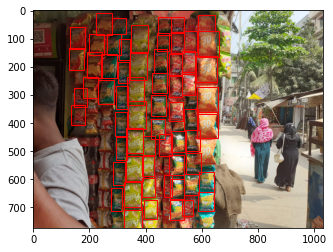

In [401]:
name_list = np.where(annot["filename"]=="200425 (104).jpeg")
import matplotlib.pyplot as plt
import matplotlib.patches as patches
file_name = annot["filename"][name_list[0][0]]
print(name_list[0][0])
# im = np.array(Image.open('stinkbug.png'), dtype=np.uint8)
img = np.array(Image.open("/Users/adityakumar/Downloads/Retail Pulse - Assignment 2/Aerial/"+file_name), dtype=np.uint8)
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img)
name_list = name_list[0]
for i in name_list:
    x1 = annot["xmin"][i]
    y1 = annot["ymin"][i]
    width = annot["xmax"][i] - x1
    height = annot["ymax"][i] - y1
    rect = patches.Rectangle((x1,y1),width,height,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

plt.show()

In [260]:
file_names

array(['200425 (80).jpeg', '200425 (108).jpeg', '200425 (40).jpeg',
       '200425 (182).jpeg', '200425 (179).jpeg', '200425 (167).jpeg',
       '200425 (104).jpeg', '200425 (62).jpeg', '200425 (84).jpeg',
       '200425 (44).jpeg', '200425 (89).jpeg', '200425 (171).jpeg',
       '200425 (101).jpeg', '200425 (76).jpeg', '200425 (109).jpeg'],
      dtype=object)